In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
plt.rc("font", family = "Malgun Gothic")
plt.rc("axes", unicode_minus = False)
plt.rcParams['axes.grid'] = True

In [5]:
df = pd.read_csv("C:/Programmierung/workspace/Python_2021/examples/Crime/Crime1.csv", header=[0,1,2],index_col = 0)
df_reverse = df.transpose()
df_reverse = df_reverse.fillna(0)
df = df_reverse.assign(강력범죄강간·강제추행 = lambda x: 
                       x['강력범죄강간·강제추행']
                       +x['강력범죄유사강간']
                       +x['강력범죄강간']
                       +x['강력범죄강제추행']
                       +x['강력범죄기타강간·강제추행등'])

df.drop(['강력범죄유사강간','강력범죄강간','강력범죄강제추행'
         ,'강력범죄기타강간·강제추행등'],axis=1,inplace=True)

In [24]:
df1 = pd.read_csv("C:/Programmierung/workspace/Python_2021/examples/Crime/Crime2.csv", header=[0,1],index_col = 0)
df1 = df1.transpose()
df1_test = df1.reset_index()
check = df1_test['연도']=="2019"
df1 = df1_test[check]
df1 = df1.drop(["연도","성별"],axis=1)
df1 = np.array(df1)
df1

array([[116816,  87394,  67772,  52245,  42811,  33449,  27552,  21738,
        158542, 700353],
       [ 34228,  17582,  10342,   6457,   4525,   2976,   2174,   1514,
          7881, 260880]], dtype=int64)

In [43]:
so_motiv= pd.read_csv("C:/Programmierung/workspace/Python_2021/examples/Crime/so_crime_motiv.csv", header=[0],index_col = 0)
so_motiv_1 = so_motiv.transpose()
so_motiv_1

범행동기별,이욕,생활비마련,유흥비마련,도박비마련,허영사치심,치부,기타,사행심,보복,"신고,고소",...,증언,기타,가정불화,호기심,유혹,우발적,현실불만,부주의,기타,미상
2012,19506,4816,6144,42,440,122,7942,1551,38,20,...,1,17,68,9594,2264,27312,710,5849,29229,11369
2013,16891,5335,5655,51,260,80,5510,1193,53,23,...,2,24,81,9336,2237,24511,605,5117,21953,9656
2014,13474,3841,3327,73,116,44,6073,891,34,16,...,1,16,75,8242,1460,21092,589,4777,19741,7219
2015,12555,3557,2661,141,101,22,6073,788,22,2,...,1,18,171,6430,1058,18228,401,4537,18266,8579
2016,12764,3510,2525,126,93,20,6490,850,129,13,...,2,114,259,8330,1168,19010,523,4632,19549,8786
2017,10850.0,3060.0,1936.0,90.0,126.0,26.0,5612.0,783.0,39.0,8.0,...,NaN,31.0,260.0,8186.0,1049.0,19496.0,420.0,4510.0,18280.0,8886.0
2018,6624,2200,1064,62,55,7,3236,681,6,1,...,-,4,181,2941,513,13287,246,2639,10662,28362
2019,6724,2252,988,114,42,11,3317,705,12,6,...,-,6,223,3118,459,13348,182,2295,10833,28348


In [44]:
so_motiv_1_t = so_motiv_1.reset_index()
sm1 = df1.drop(["범행동기별"],axis=1)
sm1 = np.array(df1)
sm1

sm1 = so_motiv_1_t.fillna(0)

sm1 = sm1.assign(강력범죄강간·강제추행 = lambda x: 
                       x['강력범죄강간·강제추행']
                       +x['강력범죄유사강간']
                       +x['강력범죄강간']
                       +x['강력범죄강제추행']
                       +x['강력범죄기타강간·강제추행등'])

df.drop(['강력범죄유사강간','강력범죄강간','강력범죄강제추행'
         ,'강력범죄기타강간·강제추행등'],axis=1,inplace=True)

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [31]:
so_motiv_1 = df.reset_index()

<AxesSubplot:>

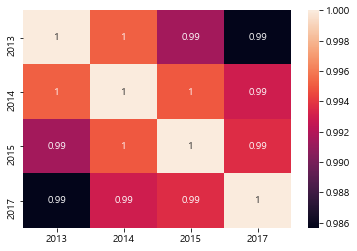

In [42]:
so_motiv_1 = so_motiv.corr()
sn.heatmap(so_motiv_1,annot=True)

In [ ]:
year = [2012,2013,2014,2015,2016,2017,2018,2019]

check_male = df_test['성별'] == 'M'
df_set_male = df_test[check_male]
m_gyo = list(df_set_male['교통범죄'].groupby(df_set_male["연도"]).sum())
m_pung = list(df_set_male['풍속범죄'].groupby(df_set_male["연도"]).sum())
m_ji = list(df_set_male['지능범죄'].groupby(df_set_male["연도"]).sum())
m_pok1 = list(df_set_male['폭력범죄폭력행위등'].groupby(df_set_male["연도"]).sum())
m_pok2 = list(df_set_male['폭력범죄폭행'].groupby(df_set_male["연도"]).sum())
m_jeol = list(df_set_male['절도범죄'].groupby(df_set_male["연도"]).sum())
m_gang = list(df_set_male['강력범죄강간·강제추행'].groupby(df_set_male["연도"]).sum())

plt.plot(year,m_gyo,label = "교통범죄")
plt.plot(year,m_pung,label = "풍속범죄")
plt.plot(year,m_ji,label = "지능범죄")
plt.plot(year,m_pok1,label = "폭력행위")
plt.plot(year,m_pok2,label = "폭행")
plt.plot(year,m_jeol,label = "절도범죄")
plt.plot(year,m_gang,label = "강력범죄")
plt.legend(loc= (1.1,0.5))
plt.show()

In [7]:
df_test = df.reset_index()

<AxesSubplot:>

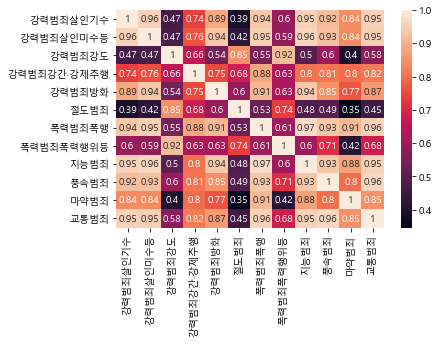

In [9]:
df_test_cor = df_test.corr()
sn.heatmap(df_test_cor,annot=True)

[78. 88. 90. 98. 85. 78. 84. 82. 78. 85. 77. 85.] [22. 12. 10.  2. 15. 22. 16. 18. 22. 15. 23. 15.]


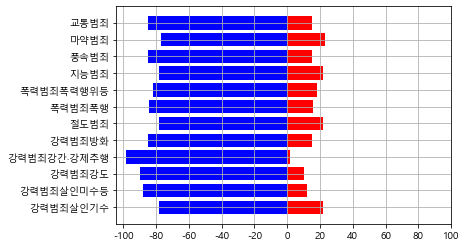

In [10]:
categories = ['강력범죄살인기수','강력범죄살인미수등'
              ,'강력범죄강도','강력범죄강간·강제추행'
              ,'강력범죄방화','절도범죄','폭력범죄폭행'
              ,'폭력범죄폭력행위등','지능범죄','풍속범죄'
              ,'마약범죄','교통범죄']
check_male = df_test['성별'] == 'M'
df_set_male = df_test[check_male]
df_set_male = df_set_male.drop(['연도','성별','연령'],axis=1)
df_male = df_set_male.sum()
df_male = np.array(df_male)
check_female = df_test['성별'] == 'F'
df_set_female = df_test[check_female]
df_set_female = df_set_female.drop(['연도','성별','연령'],axis=1)
df_female = df_set_female.sum()
df_female = np.array(df_female)

df_total = df_male + df_female
df_male = (df_male / df_total) * 100
df_male = np.round(df_male,0)
df_female = (df_female / df_total) * 100
df_female = np.round(df_female,0)
print(df_male,df_female)
Y = np.arange(12)
plt.barh(Y, df_female, color = 'r')
plt.barh(Y, -df_male, color = 'b')
plt.yticks(Y,categories)
plt.xticks([-100,-80,-60,-40,-20,0,20,40,60,80,100])
plt.show()

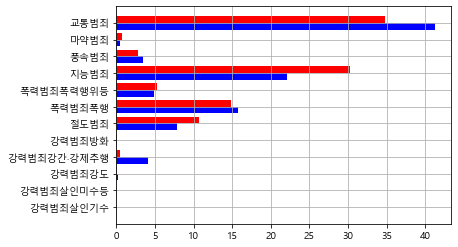

In [11]:
check_male = df_test['성별'] == 'M'
df_set_male = df_test[check_male]
df_set_male = df_set_male.drop(['연도','성별','연령'],axis=1)
df_male = df_set_male.sum()
df_male = np.array(df_male)
check_female = df_test['성별'] == 'F'
df_set_female = df_test[check_female]
df_set_female = df_set_female.drop(['연도','성별','연령'],axis=1)
df_female = df_set_female.sum()
df_female = np.array(df_female)

df_male_total = sum(list(df_male))
df_male = (df_male / df_male_total) *100
df_male = np.round(df_male,1)
df_female_total = sum(list(df_female))
df_female = (df_female / df_female_total) * 100
df_female = np.round(df_female,1)

Y = np.arange(12)
bar_width = 0.20
plt.barh(Y+bar_width, df_female,height=0.4,color = 'r')
plt.barh(Y-bar_width, df_male,height=0.4,color = 'b')
plt.yticks(Y,categories)
plt.show()

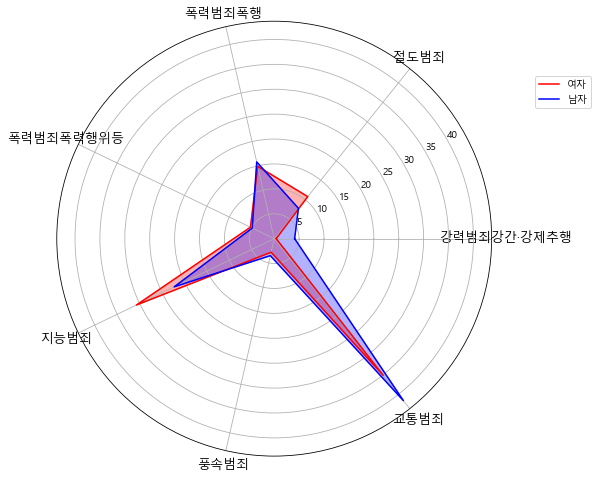

In [12]:
categories = ['강력범죄강간·강제추행','절도범죄','폭력범죄폭행'
              ,'폭력범죄폭력행위등','지능범죄','풍속범죄','교통범죄']

check_male = df_test['성별'] == 'M'
df_set_male = df_test[check_male]
df_set_male = df_set_male.drop(['연도','성별','연령','마약범죄','강력범죄방화','강력범죄강도','강력범죄살인미수등','강력범죄살인기수'],axis=1)
df_male = df_set_male.sum()
df_male = np.array(df_male)
check_female = df_test['성별'] == 'F'
df_set_female = df_test[check_female]
df_set_female = df_set_female.drop(['연도','성별','연령','마약범죄','강력범죄방화','강력범죄강도','강력범죄살인미수등','강력범죄살인기수'],axis=1)
df_female = df_set_female.sum()
df_female = np.array(df_female)

df_male_total = sum(list(df_male))
df_male = (df_male / df_male_total) *100
df_male = np.round(df_male,1)
male = list(df_male)
male += male[:1]
df_female_total = sum(list(df_female))
df_female = (df_female / df_female_total) * 100
df_female = np.round(df_female,1)
female = list(df_female)
female += female[:1]

angles = [n/float(len(categories)) * 2 * np.pi for n in range(len(categories))]
angles += angles[:1]
plt.figure(figsize=(8,8))
ax=plt.subplot(polar=True)
plt.xticks(angles[:-1], labels=categories, fontsize=13)
ax.set_rlabel_position(30)

ax.plot(angles,female,label="여자",linestyle='solid',color='red')
ax.fill(angles,female,color='red',alpha=0.3)
ax.plot(angles,male,label="남자",linestyle='solid',color='blue')
ax.fill(angles,male,color='blue',alpha=0.3)
plt.legend(loc=(1.1,0.8))
plt.show()

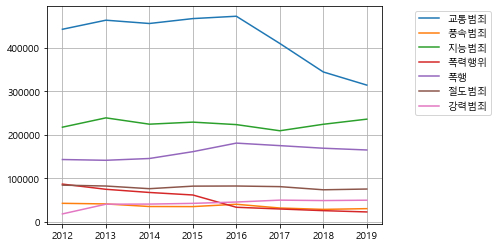

In [13]:
year = [2012,2013,2014,2015,2016,2017,2018,2019]

check_male = df_test['성별'] == 'M'
df_set_male = df_test[check_male]
m_gyo = list(df_set_male['교통범죄'].groupby(df_set_male["연도"]).sum())
m_pung = list(df_set_male['풍속범죄'].groupby(df_set_male["연도"]).sum())
m_ji = list(df_set_male['지능범죄'].groupby(df_set_male["연도"]).sum())
m_pok1 = list(df_set_male['폭력범죄폭력행위등'].groupby(df_set_male["연도"]).sum())
m_pok2 = list(df_set_male['폭력범죄폭행'].groupby(df_set_male["연도"]).sum())
m_jeol = list(df_set_male['절도범죄'].groupby(df_set_male["연도"]).sum())
m_gang = list(df_set_male['강력범죄강간·강제추행'].groupby(df_set_male["연도"]).sum())

plt.plot(year,m_gyo,label = "교통범죄")
plt.plot(year,m_pung,label = "풍속범죄")
plt.plot(year,m_ji,label = "지능범죄")
plt.plot(year,m_pok1,label = "폭력행위")
plt.plot(year,m_pok2,label = "폭행")
plt.plot(year,m_jeol,label = "절도범죄")
plt.plot(year,m_gang,label = "강력범죄")
plt.legend(loc= (1.1,0.5))
plt.show()

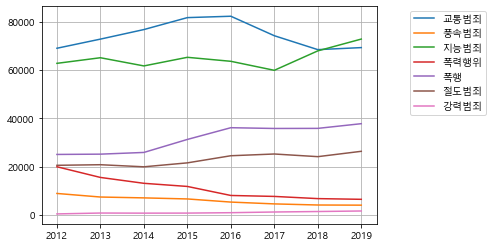

In [14]:
year = [2012,2013,2014,2015,2016,2017,2018,2019]

check_female = df_test['성별'] == 'F'
df_set_female = df_test[check_female]
f_gyo = list(df_set_female['교통범죄'].groupby(df_set_female["연도"]).sum())
f_pung = list(df_set_female['풍속범죄'].groupby(df_set_female["연도"]).sum())
f_ji = list(df_set_female['지능범죄'].groupby(df_set_female["연도"]).sum())
f_pok1 = list(df_set_female['폭력범죄폭력행위등'].groupby(df_set_female["연도"]).sum())
f_pok2 = list(df_set_female['폭력범죄폭행'].groupby(df_set_female["연도"]).sum())
f_jeol = list(df_set_female['절도범죄'].groupby(df_set_female["연도"]).sum())
f_gang = list(df_set_female['강력범죄강간·강제추행'].groupby(df_set_female["연도"]).sum())

plt.plot(year,f_gyo,label = "교통범죄")
plt.plot(year,f_pung,label = "풍속범죄")
plt.plot(year,f_ji,label = "지능범죄")
plt.plot(year,f_pok1,label = "폭력행위")
plt.plot(year,f_pok2,label = "폭행")
plt.plot(year,f_jeol,label = "절도범죄")
plt.plot(year,f_gang,label = "강력범죄")
plt.legend(loc= (1.1,0.5))
plt.show()